## 0. Objetivos :

Vamos explorar esses dados com o objetivo de conhecer nossos clientes e reconhecer os pontos positivos e negativos na linha de tempo do Resort e Hotel.

OBS: após isso vamos separar alguns clientes para apontar eventuais promoções.

### **Dataset**:

Esse dataset contem 119390 linhas de registros de reserva de um Hotel/Resort; Onde vamos usar:


*   **is_canceled**: 0 está cancelado / 1 está ativo

*   **stays_in_weekend_nights**: Quantidade de noites no final de semana

*   **stays_in_week_nights**: Quantidade de noites durante a semana

*   **arrival_date_month**: Mes chegada

*   **reservation_status**: Status da Reserva

*   **country**: País

*   **adr**: Valor da noite [EUR]

*   **children**: Crianças por família

*   **babies** : bebes por família

### Resumo:

## 1. Importações
 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Data Wrangling

In [ ]:
data = pd.read_csv('./hotel_booking.csv')

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
data['hotel'].drop_duplicates()

0        Resort Hotel
40060      City Hotel
Name: hotel, dtype: object

In [ ]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
# Identificando o numero de linhas.

#data.count(axis=0)
#data.shape[0]

rows = len(data.index)
print(f' Total numero de linhas: {rows}')

 Total numero de linhas: 119390




*   Caso exista dados ausentes, qual a coluna mais ausente?



In [ ]:

#print(missing) ----> Essa é a soma de valores ausente de cada coluna
missing = data.isnull().sum()

print('Essas são as colunas com valores ausentes:', data.columns[data.isnull().any()].tolist())
print(f'Onde - {missing.idxmax()} - Tem o maior numero de dados ausentes {missing.max()} linhas')
print()

Essas são as colunas com valores ausentes: ['children', 'country', 'agent', 'company']
Onde - company - Tem o maior numero de dados ausentes 112593 linhas



In [ ]:
data.drop('company', inplace=False, axis=1).head(n=1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322


## 3. Analise exploratória



*   Os 5 paises com maior numero de passageiros.



In [ ]:
data.query('is_canceled == 1')['arrival_date_month'].value_counts()[:]

August       5239
July         4742
May          4677
June         4535
April        4524
October      4246
September    4116
March        3149
February     2696
December     2371
November     2122
January      1807
Name: arrival_date_month, dtype: int64

In [ ]:
data['country'].value_counts()[:5]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64



*   Qual a média de preço por noite (adr)?



In [ ]:
median_adr = data['adr'].mean()
valor = np.round(median_adr, 2)

print(f'A media de preço por noite é {valor} Euros')

A media de preço por noite é 101.83 Euros




*   Qual cliente pagou a maior (adr)?



In [ ]:
max_idr = data['adr'].idxmax()
name = data.iloc[max_idr]['name']
pay = data.iloc[max_idr]['adr']

print(f'Cliente: {name} pagou {pay} Euros')

Cliente: Daniel Walter pagou 5400.0 Euros




*   Destalhes da estadia de Daniel Walter



In [ ]:
data.iloc[max_idr]

hotel                                             City Hotel
is_canceled                                                1
lead_time                                                 35
arrival_date_year                                       2016
arrival_date_month                                     March
arrival_date_week_number                                  13
arrival_date_day_of_month                                 25
stays_in_weekend_nights                                    0
stays_in_week_nights                                       1
adults                                                     2
children                                                 0.0
babies                                                     0
meal                                                      BB
country                                                  PRT
market_segment                                 Offline TA/TO
distribution_channel                                   TA/TO
is_repeated_guest       



*   Qual é a média de noites por estadia



In [ ]:
data['all_night_resort'] = data.query('hotel == "Resort Hotel"').apply(lambda x:
                                                                       x['stays_in_weekend_nights'] + x['stays_in_week_nights'], axis=1)

median_stays_resort = np.array(data['all_night_resort'].mean())

data['all_night_hotel'] = data.query('hotel == "City Hotel"').apply(lambda x:
                                                                       x['stays_in_weekend_nights'] + x['stays_in_week_nights'], axis=1)

median_stays_hotel = np.array(data['all_night_hotel'].mean())

print(f'Media de estadias no Resort: {np.round(median_stays_resort, 1)} dias')
print(f'Media de estadias no Hotel: {np.round(median_stays_hotel, 1)} dias')

Media de estadias no Resort: 4.3 dias
Media de estadias no Hotel: 3.0 dias




*   Como o preço por noite (adr) varia durante os meses do ano



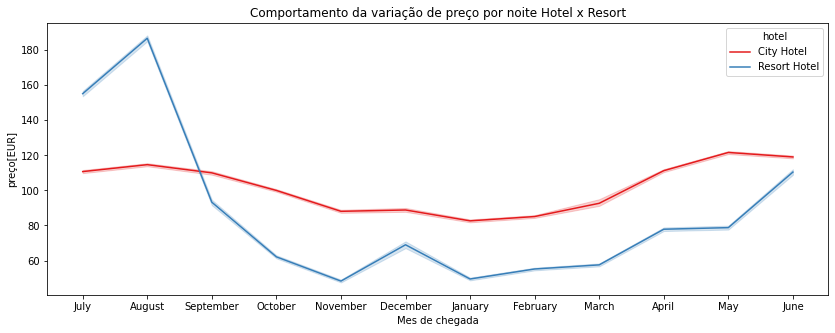

In [ ]:
plt.figure(figsize=(14,5))

sns.lineplot(data=data, x='arrival_date_month', y='adr', hue='hotel',
             hue_order= ['City Hotel', 'Resort Hotel'], palette = 'Set1')

plt.title('Comportamento da variação de preço por noite Hotel x Resort')
plt.xlabel('Mes de chegada')
plt.ylabel('preço[EUR]')
plt.show()



> Para Resort Hotel, o preço por noite (ADR) é mais caro durante julho, agosto e setembro

> Para City Hotel, o preço por noite (ADR) é um pouco mais caro durante março, abril e maio





*   Os 10 principais paises com mais reservas no hotel.  



In [ ]:
# Verificar entendimendo de normalize
data['country'].value_counts(normalize=True)[:10]

PRT    0.408656
GBR    0.102008
FRA    0.087593
ESP    0.072059
DEU    0.061286
ITA    0.031673
IRL    0.028385
BEL    0.019697
BRA    0.018704
NLD    0.017695
Name: country, dtype: float64

Text(0, 0.5, 'quantidade de reservas')

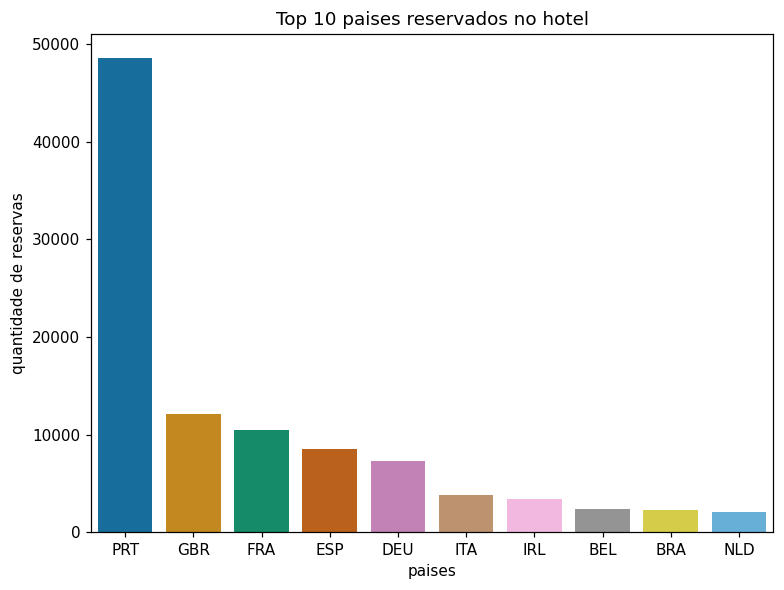

In [ ]:
plt.figure(figsize=(8,6), dpi=110)


# entender o funcionamento do order
sns.countplot(data=data, x='country', order=pd.value_counts(data['country']).iloc[:10].index, 
              palette='colorblind')

plt.title('Top 10 paises reservados no hotel')
plt.xlabel('paises')
plt.ylabel('quantidade de reservas')



>  No gráfico acima visualizamos os países com mais reservas. A maioria das reservas são criadas a partir de Portugal e depois em seguida Grã-Bretanha, França, Espanha.





* Vamos observar os meses com mais movimentação de clientes durante esses anos.



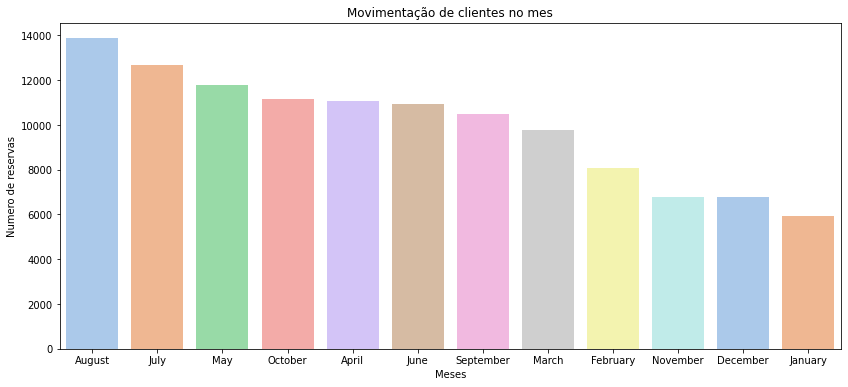

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=data , x='arrival_date_month', palette='pastel',
              order=pd.value_counts(data['arrival_date_month']).index)

plt.title('Movimentação de clientes no mes')
plt.xlabel('Meses')
plt.ylabel('Numero de reservas')
plt.show()

# Alterar esse grafico para linhas e verificar metodo show()

> O gráfico acima mostra o número de reservas criadas para cada mês e de acordo com o gráfico, **agosto** é o mês mais ocupado (mais movimentado no hotel)



*   Filtrando o nome e E-mail dos clientes com crianças e bebes para eventuais promoções.



In [ ]:
data['client_baby_and_children'] = data.apply(lambda x: x['children'] + x['babies'], axis=1 )
data.sort_values(by=['client_baby_and_children'], ascending=False)[['name','email','client_baby_and_children']][:10]

,name,email,client_baby_and_children
328,Jamie Ramirez,Ramirez_Jamie22@aol.com,10.0
46619,Nicholas Parker,Parker.Nicholas57@hotmail.com,10.0
78656,Marc Robinson,Robinson_Marc@protonmail.com,9.0
19718,Mr. Jeffrey Cross,Mr..Cross@yandex.com,3.0
107837,Albert French,French.Albert@mail.com,3.0
24409,Lindsay Rodriguez,Lindsay.Rodriguez27@comcast.net,3.0
90790,Nathaniel Kim,Nathaniel.Kim@outlook.com,3.0
95227,Nancy Cole,NancyCole75@aol.com,3.0
106216,Krystal Trevino,Krystal.Trevino@protonmail.com,3.0
27246,Faith Smith,Smith_Faith60@protonmail.com,3.0




*   Vamos se aprofundar e visualizar separadamente a quantidade de reservas canceladas no hotel e resort



In [ ]:
data['is_canceled'].value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

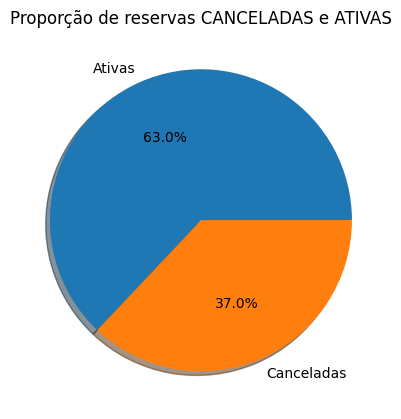

In [ ]:
plt.figure(figsize=(7,5) , dpi=100)

proportion = data['is_canceled'].value_counts()

labels = ['Ativas','Canceladas']
plt.title('Proporção de reservas CANCELADAS e ATIVAS')

plt.pie(proportion, labels=labels, shadow = True, autopct = '%1.1f%%')
plt.show()

> Para uma eventual pesquisa de satisfação, vamos recolher os dados dos clientes com cancelamento de reserva e oferecer um desconto na proxima hospedagem após um questionario.


* Qual a distribuição de cancelamento de estadia por mês?

In [ ]:
data.query('is_canceled == 1')['arrival_date_month'].value_counts()

> Sabemos que no topico 2.4 podemos observar que os meses com taxas mais baratas são fevereiro, dezembro, novembro, janeiro e logo a taxa de cancelamento é menor durante esses meses.

  OBSERVAÇÃO, CRIAR TOPICOS
  

In [ ]:
client_canceled = data.query('is_canceled == 1')[['name', 'email', 'phone-number', 'country']]
client_canceled.head()

,name,email,phone-number,country
8,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,PRT
9,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,PRT
10,Priscilla Collins PhD,PhD.Priscilla74@att.com,833-887-7898,PRT
27,Jaime Flynn,JaimeFlynn29@gmail.com,549-866-3721,PRT
32,Reginald Cunningham,Reginald_C57@outlook.com,800-249-2144,PRT


Text(0, 0.5, 'quantidade de reservas')

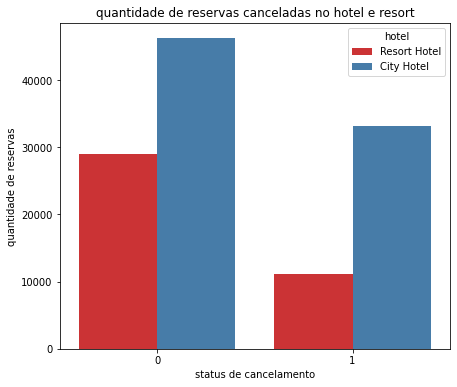

In [ ]:
plt.figure(figsize= (7,6))
sns.countplot(data=data, x='is_canceled', hue='hotel', palette='Set1')

plt.title('quantidade de reservas canceladas no hotel e resort')
plt.xlabel('status de cancelamento')
plt.ylabel('quantidade de reservas')